<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int6

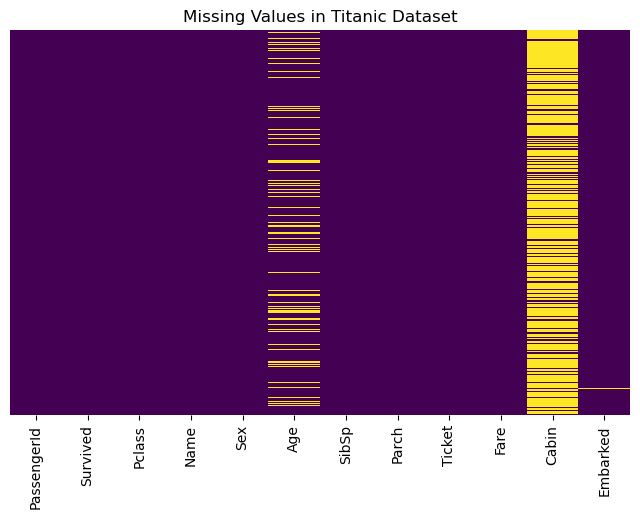

C:\Users\m8cg2\AppData\Local\Temp\ipykernel_23896\2814729211.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
C:\Users\m8cg2\AppData\Local\Temp\ipykernel_23896\2814729211.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

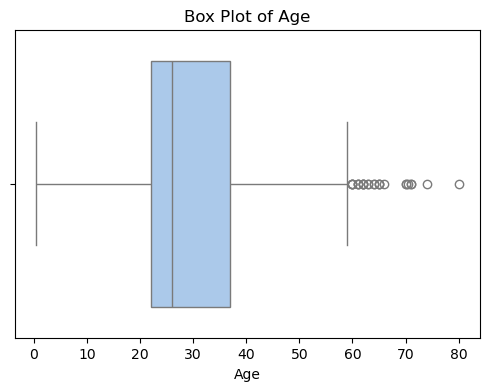

C:\Users\m8cg2\AppData\Local\Temp\ipykernel_23896\2814729211.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='pastel')


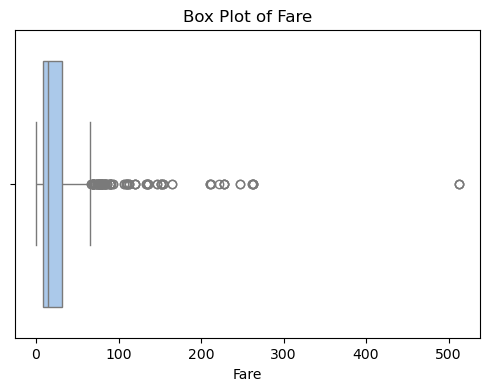

C:\Users\m8cg2\AppData\Local\Temp\ipykernel_23896\2814729211.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, palette='Set1')


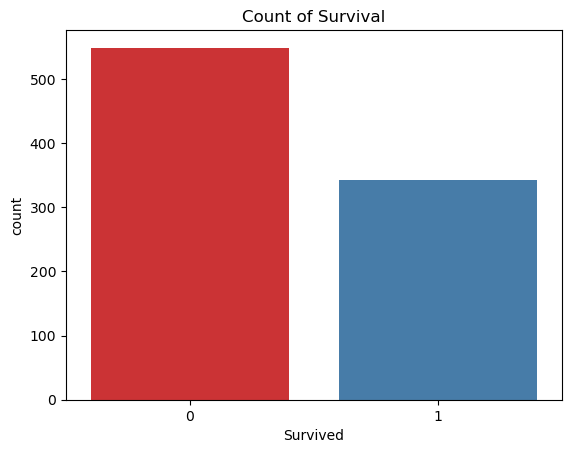

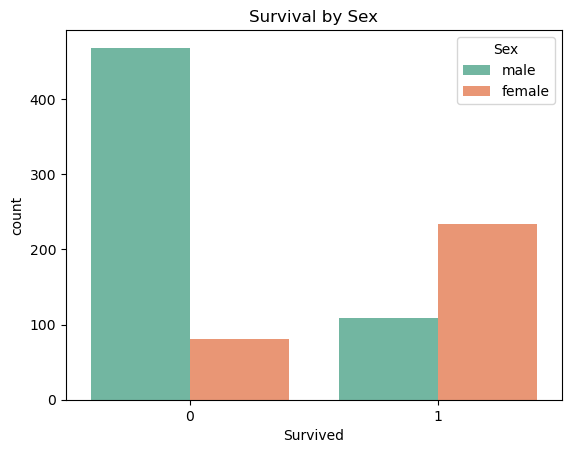

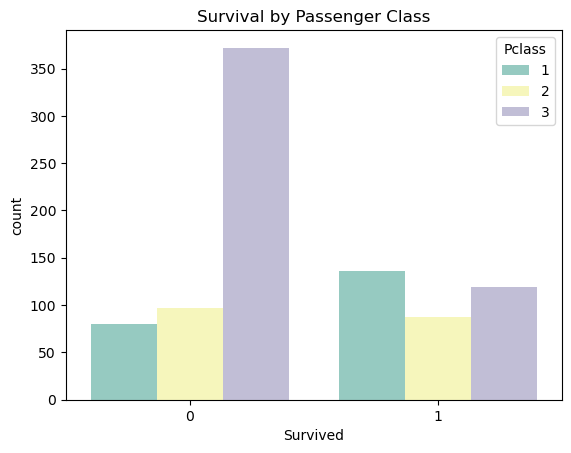

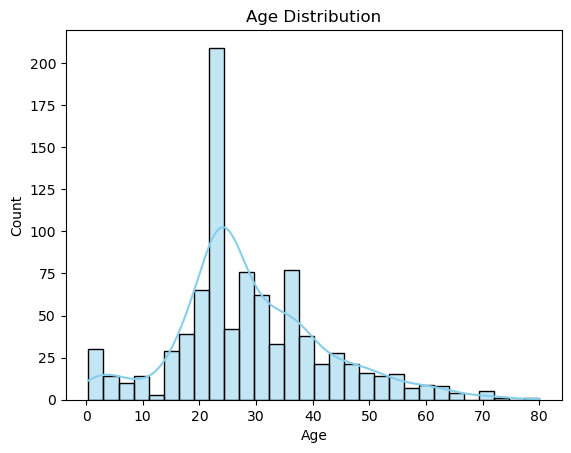

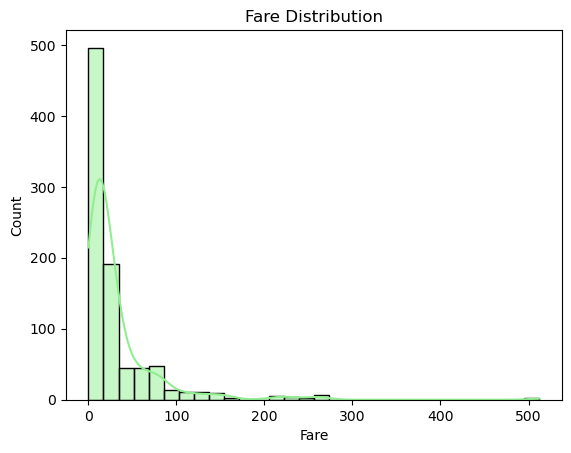

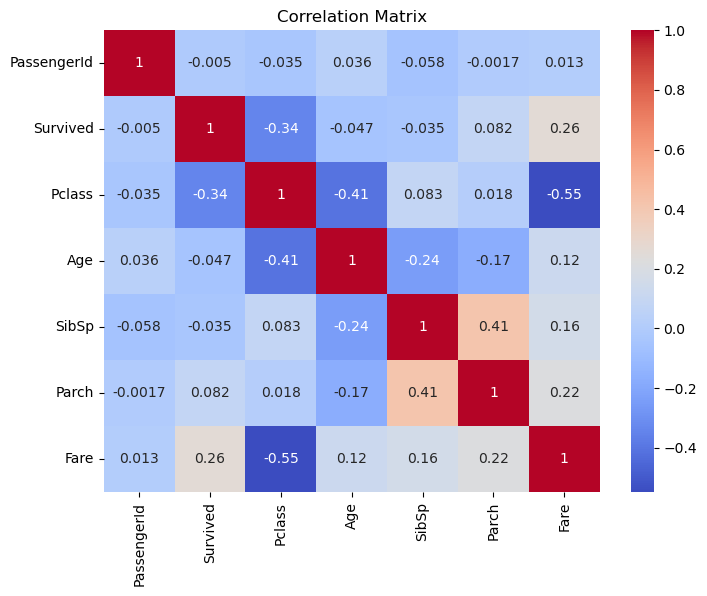

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load data
df = pd.read_csv('titanic.csv')

# 2. Peek at basic info and null counts
print(df.info())
print(df.isnull().sum())

# 3. Visualize missing values
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values in Titanic Dataset')
plt.show()

# 4. Drop & impute
df.drop('Cabin', axis=1, inplace=True)
df['Age'].fillna(df.groupby('Pclass')['Age'].transform('median'), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 5. Identify outliers using box plots (Fare and Age)
for col in ['Age', 'Fare']:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=df[col], palette='pastel')
    plt.title(f'Box Plot of {col}')
    plt.show()

# 6. Visualize distributions & relationships
# 6a: Survival count
sns.countplot(x='Survived', data=df, palette='Set1')
plt.title('Count of Survival')
plt.show()

# 6b: Survival by Sex & Class
sns.countplot(x='Survived', hue='Sex', data=df, palette='Set2')
plt.title('Survival by Sex')
plt.show()

sns.countplot(x='Survived', hue='Pclass', data=df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.show()

# 6c: Age distribution
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.show()

# 6d: Fare distribution
sns.histplot(df['Fare'], bins=30, kde=True, color='lightgreen')
plt.title('Fare Distribution')
plt.show()

# 7. Correlation matrix
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
